<a href="https://colab.research.google.com/github/eunashin/TIL/blob/master/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%EC%A0%84%EC%9E%90%EC%83%81%EA%B1%B0%EB%9E%98_%ED%95%AD%EB%AA%A9_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Multicampus_data/시각화PJ/data/신용카드 지역별_월간일평균_데이터(만원단위).csv"

In [ ]:
df = pd.read_csv(FILE_PATH, thousands = ',', encoding='cp949')
df.tail(5)

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
542,5.8.2 지역별 소비유형별 개인 신용카드,기타,금융/보험,월간 일평균,만원,원자료,45429.0,45104.0,48643.0,43804.0,...,38813.0,36880.0,38015.0,38971.0,34244.0,36710.0,33637.0,31158.0,35043.0,31315.0
543,5.8.2 지역별 소비유형별 개인 신용카드,기타,기타,월간 일평균,만원,원자료,56422.0,49035.0,50971.0,53289.0,...,39759.0,36986.0,37908.0,42478.0,32917.0,36682.0,31619.0,33358.0,32078.0,37303.0
544,5.8.2 지역별 소비유형별 개인 신용카드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,통계담당 : 한국은행 금융결제국 결제안정팀(02-750-6657),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,주 : 지역별(가맹점 소재지 기준) 소비유형별 개인 신용카드 실적은 실승인실적 기준...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 정리하기

In [ ]:
# 데이터가 아닌 마지막 3줄 삭제
df= df.iloc[:-3, :]

# 데이터 정리
del df['변환']
del df['항목명3']
del df['통계표']
del df['단위']

# 전자상거래/통신판매 데이터만 추출
df_on = df[df['항목명2']=='전자상거래/통신판매']
df_on = df_on.T
df_on.head(3)

,6,38,70,102,134,166,198,230,262,294,326,358,390,422,454,486,518
항목명1,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
항목명2,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매,전자상거래/통신판매
2019/01,17780642.0,31366.0,34955.0,34443.0,5752.0,17841.0,7603.0,6202391.0,19310.0,5902.0,12470.0,17437.0,7021.0,10245.0,17076.0,52271.0,244680.0


In [ ]:
# 칼럼 정리

df_on = df_on.rename(columns = df_on.iloc[0])
df_on.drop(['항목명1','항목명2'], axis=0, inplace=True)
df_on = df_on.reset_index()
df_on.head(3)

,index,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
0,2019/01,17780642.0,31366.0,34955.0,34443.0,5752.0,17841.0,7603.0,6202391.0,19310.0,5902.0,12470.0,17437.0,7021.0,10245.0,17076.0,52271.0,244680.0
1,2019/02,17160587.0,23124.0,42462.0,23174.0,4358.0,14342.0,4976.0,6203119.0,12926.0,3857.0,8083.0,14468.0,4908.0,8748.0,13698.0,42196.0,239683.0
2,2019/03,17976260.0,23928.0,39211.0,26215.0,5019.0,15590.0,5636.0,6537774.0,13076.0,4175.0,9240.0,13150.0,5477.0,8286.0,12572.0,36982.0,241136.0


In [ ]:
# 타입 변환

df_on['index'] = pd.to_datetime(df_on['index'])
df_on.rename(columns={'index':'날짜'}, inplace=True)
df_on.iloc[:,1:] = df_on.iloc[:,1:].astype(float)
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      37 non-null     datetime64[ns]
 1   서울      37 non-null     float64       
 2   부산      37 non-null     float64       
 3   대구      37 non-null     float64       
 4   인천      37 non-null     float64       
 5   광주      37 non-null     float64       
 6   대전      37 non-null     float64       
 7   울산      37 non-null     float64       
 8   경기      37 non-null     float64       
 9   강원      37 non-null     float64       
 10  충북      37 non-null     float64       
 11  충남      37 non-null     float64       
 12  전북      37 non-null     float64       
 13  전남      37 non-null     float64       
 14  경북      37 non-null     float64       
 15  경남      37 non-null     float64       
 16  제주      37 non-null     float64       
 17  기타      37 non-null     float64       
dtypes: datetime6

# 데이터 가공하기

In [ ]:
# 년도별 소비 합계 구하기

df_on['합계'] = df_on.iloc[:, :].sum(axis=1)
df_on.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타,합계
0,2019-01-01,17780642.0,31366.0,34955.0,34443.0,5752.0,17841.0,7603.0,6202391.0,19310.0,5902.0,12470.0,17437.0,7021.0,10245.0,17076.0,52271.0,244680.0,24501405.0
1,2019-02-01,17160587.0,23124.0,42462.0,23174.0,4358.0,14342.0,4976.0,6203119.0,12926.0,3857.0,8083.0,14468.0,4908.0,8748.0,13698.0,42196.0,239683.0,23824709.0
2,2019-03-01,17976260.0,23928.0,39211.0,26215.0,5019.0,15590.0,5636.0,6537774.0,13076.0,4175.0,9240.0,13150.0,5477.0,8286.0,12572.0,36982.0,241136.0,24973727.0
3,2019-04-01,18689224.0,24353.0,38719.0,25424.0,4370.0,15173.0,5874.0,5847421.0,14613.0,4236.0,9456.0,13494.0,5260.0,7914.0,12528.0,38511.0,230074.0,24986644.0
4,2019-05-01,20171366.0,23659.0,31339.0,24215.0,4276.0,15038.0,5459.0,4608044.0,13436.0,3826.0,8833.0,13274.0,5814.0,7594.0,12648.0,38809.0,228713.0,25216343.0


In [ ]:
## 온라인 총 소비 증가율

df_all_sum = pd.DataFrame(
    {
        '년도' : df_on['날짜'],
     '합계' : df_on['합계']
    }
)

df_all_sum['년도'] = df_all_sum['년도'].dt.strftime('%y-%m')
df_all_sum.head()

,년도,합계
0,19-01,24501405.0
1,19-02,23824709.0
2,19-03,24973727.0
3,19-04,24986644.0
4,19-05,25216343.0


# 거리두기 on/off 나누기

In [ ]:
# 거리두기OFF
df_off_set = df_all_sum[df_all_sum['년도'] <= '20-02']
df_off_set.head()

,년도,합계
0,19-01,24501405.0
1,19-02,23824709.0
2,19-03,24973727.0
3,19-04,24986644.0
4,19-05,25216343.0


In [ ]:
# 거리두기ON
df_on_set = df_all_sum[df_all_sum['년도'] > '20-02']
df_on_set.head()

,년도,합계
14,20-03,30182734.0
15,20-04,29845497.0
16,20-05,30201793.0
17,20-06,31705274.0
18,20-07,30936470.0


# 시각화 및 분석

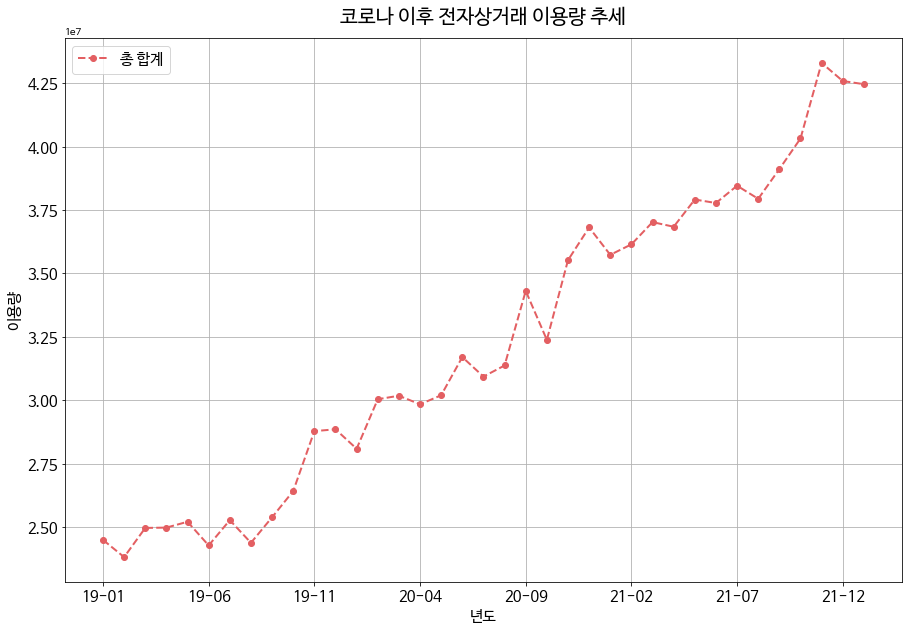

In [ ]:
df_all_sum.plot(x='년도', y='합계', 
                color='#e35f62', marker='o', linestyle='--', 
                linewidth=2.0, figsize=(15,10), fontsize=15 )
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')
plt.grid()

plt.title("코로나 이후 전자상거래 이용량 추세", fontsize=20, pad=15)
plt.xlabel("년도", fontsize=15)
plt.ylabel("이용량", fontsize=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()


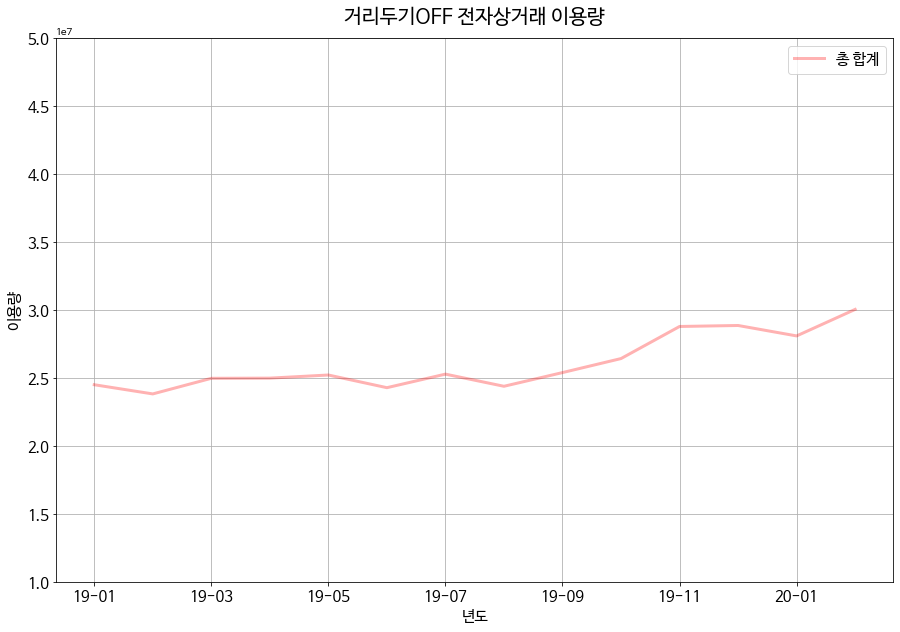

In [ ]:
df_off_set.plot(x='년도', y='합계', figsize=(15,10), fontsize=15,alpha=0.3, color='red', linewidth=3.0)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')
plt.grid()
plt.ylim(10000000, 50000000)

plt.title("거리두기OFF 전자상거래 이용량", fontsize=20, pad=15)
plt.xlabel("년도", fontsize=15)
plt.ylabel("이용량", fontsize=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()


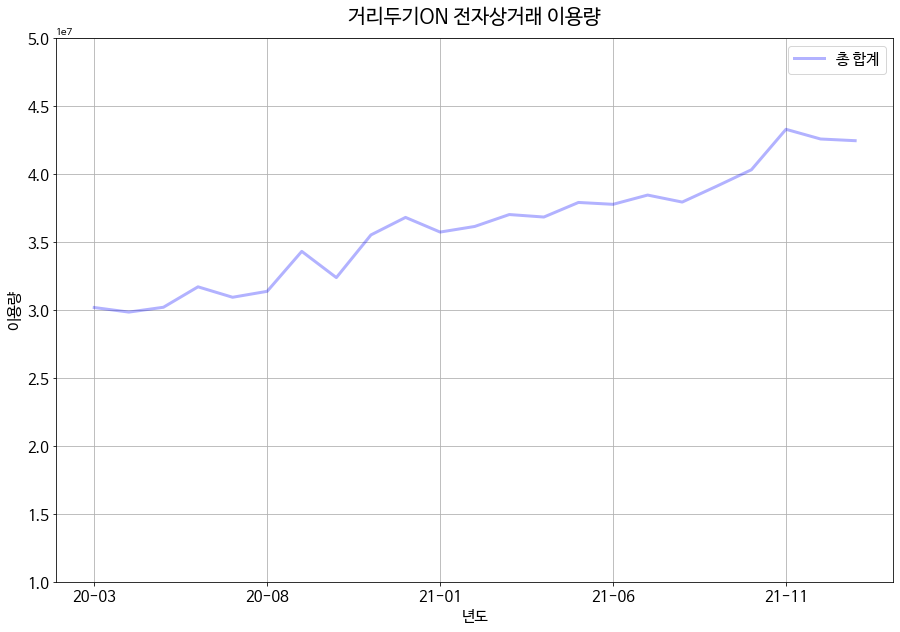

In [ ]:
df_on_set.plot(x='년도', y='합계', figsize=(15,10), fontsize=15,alpha=0.3, color='blue', linewidth=3.0)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')
plt.grid()
plt.ylim(10000000, 50000000)

plt.title("거리두기ON 전자상거래 이용량", fontsize=20, pad=15)
plt.xlabel("년도", fontsize=15)
plt.ylabel("이용량", fontsize=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()


# 증가율 구하기

In [ ]:
# 증가율 구하기

rate = []
for i in range( len(df_all_sum['합계'])-1 ):
  a = int(df_all_sum['합계'][i])
  b = int(df_all_sum['합계'][i+1])
  rate.append(a - b)

df_rate = pd.DataFrame(rate, columns=['증가율'])
df_rate.head()

,증가율
0,676696
1,-1149018
2,-12917
3,-229699
4,932474


In [ ]:
# 첫 행 증가율은 0
zero = 0
zero1 = pd.DataFrame(zero,index=['999'], columns=['증가율'])
zero1


,증가율
999,0


In [ ]:
# 합치기

df_rate1 = pd.concat([zero1, df_rate], axis=0)
df_rate1 = df_rate1.reset_index()
df_rate1.head()

,index,증가율
0,999,0
1,0,676696
2,1,-1149018
3,2,-12917
4,3,-229699


In [ ]:
# 날짜가 빠졌네
all = pd.concat([df_all_sum, df_rate1], axis=1)
all = all.drop(columns=['index'])
all = all.rename(columns={'증가율':'증감율'})
all.head()


,년도,합계,증감율
0,19-01,24501405.0,0
1,19-02,23824709.0,676696
2,19-03,24973727.0,-1149018
3,19-04,24986644.0,-12917
4,19-05,25216343.0,-229699


In [ ]:
all0 = all[all['년도'] >= '20-01']
all0

,년도,합계,증감율
12,20-01,28092797.0,767472
13,20-02,30044136.0,-1951339
14,20-03,30182734.0,-138598
15,20-04,29845497.0,337237
16,20-05,30201793.0,-356296
17,20-06,31705274.0,-1503481
18,20-07,30936470.0,768804
19,20-08,31374260.0,-437790
20,20-09,34314192.0,-2939932
21,20-10,32383615.0,1930577


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


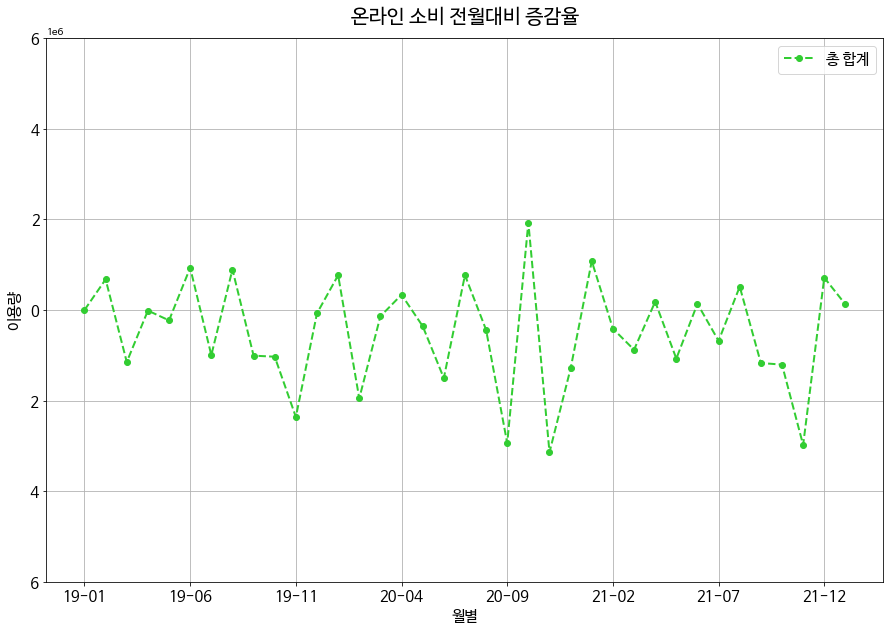

In [ ]:
all.plot(x='년도', y='증감율', 
                color='limegreen', marker='o', linestyle='--', 
                linewidth=2.0, figsize=(15,10), fontsize=15 )
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')
plt.grid()
plt.ylim( -6000000,6000000)

plt.title("온라인 소비 전월대비 증감율", fontsize=20, pad=15)
plt.xlabel("월별", fontsize=15)
plt.ylabel("이용량", fontsize=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()


In [ ]:
all_19 = all[all['년도'] > '19-01']
all_19 = all[all['년도'] <= '19-12'] 
all_19

,년도,합계,증감율
0,19-01,24501405.0,0
1,19-02,23824709.0,676696
2,19-03,24973727.0,-1149018
3,19-04,24986644.0,-12917
4,19-05,25216343.0,-229699
5,19-06,24283869.0,932474
6,19-07,25280610.0,-996741
7,19-08,24387161.0,893449
8,19-09,25394919.0,-1007758
9,19-10,26426145.0,-1031226


In [ ]:
all_19_mean = all_19['합계'].mean()
all_19.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


합계     2.557695e+07
증감율   -3.632387e+05
dtype: float64

In [ ]:
all_20 = all[all['년도'] > '19-12'] 
all_20

,년도,합계,증감율
12,20-01,28092797.0,767472
13,20-02,30044136.0,-1951339
14,20-03,30182734.0,-138598
15,20-04,29845497.0,337237
16,20-05,30201793.0,-356296
17,20-06,31705274.0,-1503481
18,20-07,30936470.0,768804
19,20-08,31374260.0,-437790
20,20-09,34314192.0,-2939932
21,20-10,32383615.0,1930577


In [ ]:
all_20['작년대비'] = all_20.groupby('년도')['증감율'].transform(all_19_mean)
all_20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,년도,합계,증감율,작년대비
12,20-01,28092797.0,767472,767472.0
13,20-02,30044136.0,-1951339,-1951339.0
14,20-03,30182734.0,-138598,-138598.0
15,20-04,29845497.0,337237,337237.0
16,20-05,30201793.0,-356296,-356296.0
17,20-06,31705274.0,-1503481,-1503481.0
18,20-07,30936470.0,768804,768804.0
19,20-08,31374260.0,-437790,-437790.0
20,20-09,34314192.0,-2939932,-2939932.0
21,20-10,32383615.0,1930577,1930577.0



### $$증감률 = {42458596.0 - 24501405.0 \over 24501405.0} * 100 $$